In [125]:
!pip install psycopg2-binary sqlalchemy pandas


# MACHINE LEARNING INTERN ASSIGNMENT

Name- Kanika Gulati

Importing necessary libraries

In [126]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine


In [127]:
host = "branchhomeworkdb.cv8nj4hg6yra.ap-south-1.rds.amazonaws.com"
port = "5432"
user = "datascientist"
password = "47eyYBLT0laW5j9U24Uuy8gLcrN"
database = "branchdsprojectgps"


In [128]:
conn = psycopg2.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database
)

# Test the connection
query = "SELECT * FROM loan_outcomes LIMIT 5;"
df = pd.read_sql_query(query, conn)
print(df)

# Close the connection after use
conn.close()


<ipython-input-128-9b5c873b8688>:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


   user_id             application_at loan_outcome
0        1 2017-08-14 09:08:50.000000    defaulted
1        2 2016-05-17 10:10:12.447976       repaid
2        3 2016-10-20 10:07:20.459081    defaulted
3        4 2017-01-13 13:03:34.000000    defaulted
4        5 2016-11-03 15:41:39.124610       repaid


In [129]:
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')


# For loan_outcomes
loan_outcomes = pd.read_sql("SELECT * FROM loan_outcomes", engine)

# For gps_fixes
gps_fixes = pd.read_sql("SELECT * FROM gps_fixes", engine)

# For user_attributes
user_attributes = pd.read_sql("SELECT * FROM user_attributes", engine)




In [130]:
loan_outcomes

user_id             application_at loan_outcome
0          1 2017-08-14 09:08:50.000000    defaulted
1          2 2016-05-17 10:10:12.447976       repaid
2          3 2016-10-20 10:07:20.459081    defaulted
3          4 2017-01-13 13:03:34.000000    defaulted
4          5 2016-11-03 15:41:39.124610       repaid
..       ...                        ...          ...
395      396 2016-10-10 12:20:18.367328    defaulted
396      397 2018-02-12 08:29:42.000000    defaulted
397      398 2016-08-30 11:01:41.879989    defaulted
398      399 2016-09-11 08:14:06.034076    defaulted
399      400 2017-08-09 13:07:43.000000    defaulted

[400 rows x 3 columns]

In [131]:
gps_fixes

gps_fix_at    server_upload_at  longitude  latitude  accuracy  \
0     2017-06-22 09:37:20 2017-06-22 09:43:42  36.840540 -1.294342      68.4   
1     2017-08-14 07:50:27 2017-08-14 09:05:27  36.895270 -1.341928    1409.0   
2     2017-06-13 10:34:29 2017-06-13 10:54:48  36.811903 -1.307220      68.4   
3     2017-06-18 12:16:20 2017-06-18 12:16:24  36.907049 -1.309984    1581.0   
4     2017-06-28 09:39:08 2017-06-28 09:58:12  36.839396 -1.280310    1396.0   
...                   ...                 ...        ...       ...       ...   
26705 2016-04-18 16:29:59 2016-04-18 16:30:04  37.353319 -1.298492    4744.0   
26706 2016-06-03 12:50:27 2016-06-03 12:50:36  37.368250 -1.298735    4656.0   
26707 2016-06-03 15:14:14 2016-06-03 15:14:21  37.359132 -1.314915    4656.0   
26708 2016-05-14 16:55:33 2016-05-14 16:55:48  37.350336 -1.260356    3419.0   
26709 2016-06-03 17:19:25 2016-06-03 17:19:34  37.345677 -1.290046    3606.0   

       altitude  bearing location_provider  user_id  
0           0.0      0.0             fused        1  
1           0.0      0.0             fused        1  
2           0.0      0.0             fused        1  
3           0.0      0.0             fused        1  
4           0.0      0.0             fused        1  
...         ...      ...               ...      ...  
26705      -1.0     -1.0           network      400  
26706      -1.0     -1.0           network      400  
26707      -1.0     -1.0           network      400  
26708      -1.0     -1.0           network      400  
26709      -1.0     -1.0           network      400  

[26710 rows x 9 columns]

In [132]:
user_attributes

user_id  age  cash_incoming_30days
0          1   42               8988.12
1          2   36               9968.12
2          3   27                 59.04
3          4   38               2129.03
4          5   33               2102.53
..       ...  ...                   ...
395      396   29               1947.86
396      397   28               6099.13
397      398   24               7136.95
398      399   62              18043.21
399      400   18               6277.52

[400 rows x 3 columns]

In [133]:
gps_fixes.dtypes

gps_fix_at           datetime64[ns]
server_upload_at     datetime64[ns]
longitude                   float64
latitude                    float64
accuracy                    float64
altitude                    float64
bearing                     float64
location_provider            object
user_id                       int64
dtype: object

In [134]:
loan_outcomes.dtypes

user_id                    int64
application_at    datetime64[ns]
loan_outcome              object
dtype: object

# Checking for missing values in all tables

In [135]:
# Check missing values for each table
print("Missing values in loan_outcomes:")
print(loan_outcomes.isnull().sum())

print("\nMissing values in gps_fixes:")
print(gps_fixes.isnull().sum())

print("\nMissing values in user_attributes:")
print(user_attributes.isnull().sum())


Missing values in loan_outcomes:
user_id           0
application_at    0
loan_outcome      0
dtype: int64

Missing values in gps_fixes:
gps_fix_at           0
server_upload_at     0
longitude            0
latitude             0
accuracy             0
altitude             0
bearing              0
location_provider    0
user_id              0
dtype: int64

Missing values in user_attributes:
user_id                 0
age                     0
cash_incoming_30days    0
dtype: int64


# no missing values found

In [136]:
#summary of all tables

In [137]:
import pandas as pd

# Function to summarize a table
def summarize_table(df, table_name):
    print(f"\n--- Summary for {table_name} ---")

    # General Info
    print("\nGeneral Info:")
    print(df.info())

    # Missing Values
    print("\nMissing Values:")
    missing = df.isnull().sum()
    missing_percentage = (missing / len(df)) * 100
    print(pd.DataFrame({"Missing Values": missing, "Percentage (%)": missing_percentage}))

    # Numerical Summary
    print("\nNumerical Summary:")
    print(df.describe())

    # Categorical Columns Summary
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if not categorical_cols.empty:
        print("\nCategorical Columns Summary:")
        for col in categorical_cols:
            print(f"\nColumn: {col}")
            print(df[col].value_counts())

# Load your data (assuming you already have connections set up)
loan_outcomes = pd.read_sql("SELECT * FROM loan_outcomes", engine)
gps_fixes = pd.read_sql("SELECT * FROM gps_fixes", engine)
user_attributes = pd.read_sql("SELECT * FROM user_attributes", engine)

# Summarize all tables
tables = {
    "loan_outcomes": loan_outcomes,
    "gps_fixes": gps_fixes,
    "user_attributes": user_attributes
}

for table_name, df in tables.items():
    summarize_table(df, table_name)


--- Summary for loan_outcomes ---

General Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         400 non-null    int64         
 1   application_at  400 non-null    datetime64[ns]
 2   loan_outcome    400 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 9.5+ KB
None

Missing Values:
                Missing Values  Percentage (%)
user_id                      0             0.0
application_at               0             0.0
loan_outcome                 0             0.0

Numerical Summary:
          user_id                 application_at
count  400.000000                            400
mean   200.500000  2017-08-02 04:03:22.879437312
min      1.000000            2015-06-29 15:30:55
25%    100.750000  2016-12-28 01:25:21.750000128
50%    200.500000            2017-08-12 12

#Distribution of Age

<ipython-input-138-0127510f6f89>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette="viridis")


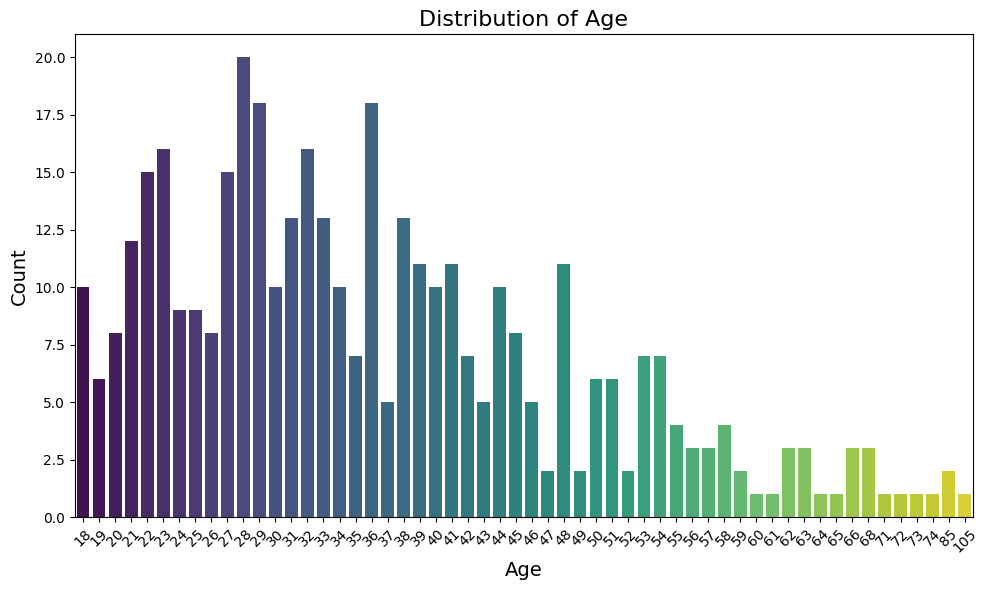

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique values of the "age" column
age_counts = user_attributes['age'].value_counts()



# Plot a bar chart for the "age" column
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette="viridis")
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# <span style="background-color: #FA8072; color: #FA8072; padding: 5px; border-radius: 5px;">Distribution of Loan Outcomes</span>




In [139]:
loan_outcome_counts = loan_outcomes['loan_outcome'].value_counts()

<ipython-input-140-b5f6d2eab09e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_outcome_counts.index, y=loan_outcome_counts.values, palette="Set2")


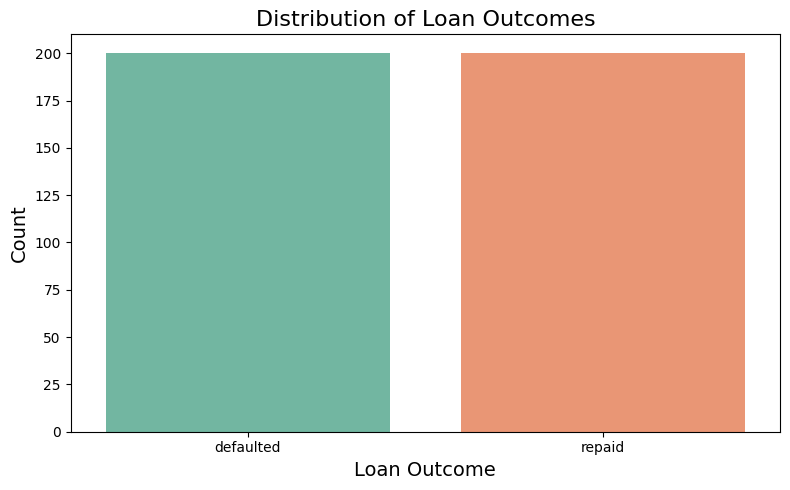

In [140]:
plt.figure(figsize=(8, 5))
sns.barplot(x=loan_outcome_counts.index, y=loan_outcome_counts.values, palette="Set2")
plt.title("Distribution of Loan Outcomes", fontsize=16)
plt.xlabel("Loan Outcome", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.tight_layout()
plt.show()


The bar plot visually represents the distribution of loan outcomes, showing the count of loans that were either repaid or defaulted. It provides a clear comparison of the frequency of each outcome, helping to assess the balance or skewness of the data.

#Average Cash Incoming (30 Days) by Age

<ipython-input-141-4caa10edb554>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='cash_incoming_30days', data=average_cash_incoming, palette="coolwarm")


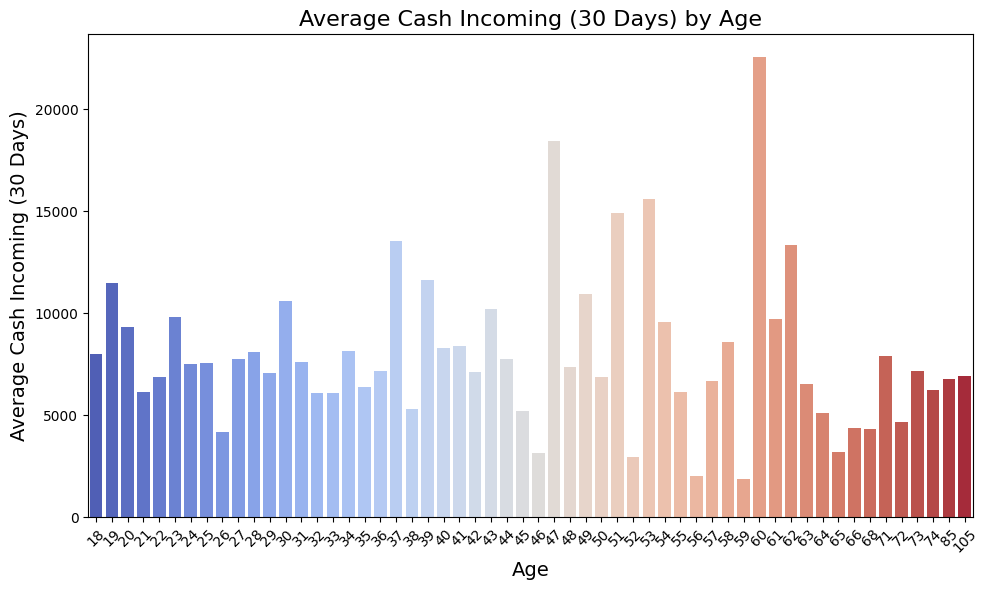

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'age' and calculate the average of 'cash_incoming_30days'
average_cash_incoming = user_attributes.groupby('age')['cash_incoming_30days'].mean().reset_index()


# Plot the average cash incoming by age
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='cash_incoming_30days', data=average_cash_incoming, palette="coolwarm")
plt.title("Average Cash Incoming (30 Days) by Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Average Cash Incoming (30 Days)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar plot provides insights into how the average cash incoming over the past 30 days varies with age. If the plot shows an upward or downward trend, it indicates how income might change as people age. For instance, younger or older age groups may have lower or higher cash inflows, which can reflect factors like employment status, career progression, or financial stability. The plot helps identify patterns or anomalies in cash flow relative to age, aiding in demographic analysis and targeted financial strategies.

In [142]:
import folium
from folium.plugins import MarkerCluster

# Extract longitude and latitude columns
gps_data = gps_fixes[['latitude', 'longitude']]

# Check if there are valid GPS coordinates
if gps_data.isnull().any().any():
    gps_data = gps_data.dropna()  # Drop rows with missing GPS data

# Create a map centered at the mean location
mean_lat = gps_data['latitude'].mean()
mean_lon = gps_data['longitude'].mean()
map_visualization = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)

# Add markers for each GPS point
marker_cluster = MarkerCluster().add_to(map_visualization)
for idx, row in gps_data.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(marker_cluster)

# Display the map
map_visualization.save("gps_map.html")
map_visualization


The provided Python code uses the folium library to visualize GPS coordinates from the gps_fixes DataFrame on an interactive map. It first extracts the latitude and longitude columns from the dataset and ensures that no missing values are present by dropping any rows with NaN entries. The map is then created with a starting view centered at the mean latitude and longitude of the GPS data, allowing for an optimal view of the data points. The MarkerCluster feature is used to group nearby GPS points into clusters, making the map more readable when dealing with a large number of markers. A marker is added for each valid GPS coordinate, and the map is saved as an HTML file. The result is an interactive map that visually represents the geographical distribution of the GPS coordinates across the dataset.

#Feature Engineering

In [143]:

loan_outcomes.head()


user_id             application_at loan_outcome
0        1 2017-08-14 09:08:50.000000    defaulted
1        2 2016-05-17 10:10:12.447976       repaid
2        3 2016-10-20 10:07:20.459081    defaulted
3        4 2017-01-13 13:03:34.000000    defaulted
4        5 2016-11-03 15:41:39.124610       repaid

In [144]:
gps_fixes.head()


gps_fix_at    server_upload_at  longitude  latitude  accuracy  \
0 2017-06-22 09:37:20 2017-06-22 09:43:42  36.840540 -1.294342      68.4   
1 2017-08-14 07:50:27 2017-08-14 09:05:27  36.895270 -1.341928    1409.0   
2 2017-06-13 10:34:29 2017-06-13 10:54:48  36.811903 -1.307220      68.4   
3 2017-06-18 12:16:20 2017-06-18 12:16:24  36.907049 -1.309984    1581.0   
4 2017-06-28 09:39:08 2017-06-28 09:58:12  36.839396 -1.280310    1396.0   

   altitude  bearing location_provider  user_id  
0       0.0      0.0             fused        1  
1       0.0      0.0             fused        1  
2       0.0      0.0             fused        1  
3       0.0      0.0             fused        1  
4       0.0      0.0             fused        1

In [145]:
user_attributes.head()

user_id  age  cash_incoming_30days
0        1   42               8988.12
1        2   36               9968.12
2        3   27                 59.04
3        4   38               2129.03
4        5   33               2102.53

In [146]:

unique_user_ids = gps_fixes['user_id'].unique()
unique_user_ids

array([  1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  19,  20,  21,  22,  23,  24,  25,  26,  27,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  43,
        45,  46,  47,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  79,  80,  81,  83,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98, 100, 101, 102,
       103, 104, 106, 107, 109, 110, 111, 112, 113, 114, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 167, 168, 169, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 20

In [147]:
gps_fixes.dtypes

gps_fix_at           datetime64[ns]
server_upload_at     datetime64[ns]
longitude                   float64
latitude                    float64
accuracy                    float64
altitude                    float64
bearing                     float64
location_provider            object
user_id                       int64
dtype: object

In [148]:
# Define aggregation methods for each column
aggregated_gps = gps_fixes.groupby('user_id').agg({
    'gps_fix_at': 'min',  # Earliest GPS fix time
    'server_upload_at': 'max',  # Latest server upload time
    'longitude': 'mean',  # Average longitude
    'latitude': 'mean',  # Average latitude
    'accuracy': 'mean',  # Average accuracy
    'altitude': 'mean',  # Average altitude
    'bearing': 'mean',  # Average bearing
    'location_provider': 'first',  # First location provider
}).reset_index()

# Display the resulting DataFrame
print("Aggregated GPS Features by User ID:")
print(aggregated_gps.head())

# Verify the size of the resulting DataFrame
print("\nSize of aggregated DataFrame:", len(aggregated_gps))


Aggregated GPS Features by User ID:
   user_id          gps_fix_at    server_upload_at  longitude   latitude  \
0        1 2017-01-24 04:54:59 2017-08-15 05:34:09  36.782813  -1.270427   
1        2 2016-05-01 05:41:34 2018-04-19 09:33:43  37.118432  -1.488055   
2        3 2016-06-01 09:42:34 2016-06-01 09:42:46  35.707550  -0.889673   
3        4 2016-09-29 11:07:14 2017-03-04 04:08:32  36.082255  -0.306798   
4        5 2016-07-21 06:51:05 2017-11-10 14:26:22 -12.370879  17.800041   

      accuracy     altitude     bearing location_provider  
0  1105.084571    75.690000    8.214286             fused  
1    48.596000  1030.603000   18.860000             fused  
2     6.500000  2190.900000  273.620000               gps  
3  2172.200000     0.000000    0.000000             fused  
4    43.461111   542.622222   50.248889             fused  

Size of aggregated DataFrame: 372


The transformation reduces the dataset to one row per user, making it easier to analyze user-specific GPS behavior and trends. The aggregation provides insights into user activity patterns, such as their typical location, movement behavior, and the quality of GPS data (through accuracy and altitude). The resulting DataFrame, which has 400 rows (one per user), can now be used for further analysis or modeling.

In [149]:

# Merge loan_outcomes and user_attributes
merged_df = pd.merge(loan_outcomes, user_attributes, on='user_id', how='inner')

# Merge the result with the aggregated GPS data
final_df = pd.merge(merged_df, aggregated_gps, on='user_id', how='inner')

# Verify the size of the final DataFrame
print("\nSize of the final merged DataFrame:", len(final_df))

# Display the first few rows of the final DataFrame
final_df.head()


Size of the final merged DataFrame: 372


user_id             application_at loan_outcome  age  cash_incoming_30days  \
0        1 2017-08-14 09:08:50.000000    defaulted   42               8988.12   
1        2 2016-05-17 10:10:12.447976       repaid   36               9968.12   
2        3 2016-10-20 10:07:20.459081    defaulted   27                 59.04   
3        4 2017-01-13 13:03:34.000000    defaulted   38               2129.03   
4        5 2016-11-03 15:41:39.124610       repaid   33               2102.53   

           gps_fix_at    server_upload_at  longitude   latitude     accuracy  \
0 2017-01-24 04:54:59 2017-08-15 05:34:09  36.782813  -1.270427  1105.084571   
1 2016-05-01 05:41:34 2018-04-19 09:33:43  37.118432  -1.488055    48.596000   
2 2016-06-01 09:42:34 2016-06-01 09:42:46  35.707550  -0.889673     6.500000   
3 2016-09-29 11:07:14 2017-03-04 04:08:32  36.082255  -0.306798  2172.200000   
4 2016-07-21 06:51:05 2017-11-10 14:26:22 -12.370879  17.800041    43.461111   

      altitude     bearing location_provider  
0    75.690000    8.214286             fused  
1  1030.603000   18.860000             fused  
2  2190.900000  273.620000               gps  
3     0.000000    0.000000             fused  
4   542.622222   50.248889             fused

the code aggregates the gps_fixes dataset by user_id, applying various aggregation methods for each column. For example, it calculates the earliest gps_fix_at, the latest server_upload_at, and the mean of numerical columns like longitude, latitude, accuracy, altitude, and bearing. The result is a new DataFrame with one row per user_id, summarizing their GPS data, and the size of this aggregated DataFrame is printed to verify the output.

In [150]:
final_df.shape

(372, 13)

In [151]:
final_df.dtypes

user_id                          int64
application_at          datetime64[ns]
loan_outcome                    object
age                              int64
cash_incoming_30days           float64
gps_fix_at              datetime64[ns]
server_upload_at        datetime64[ns]
longitude                      float64
latitude                       float64
accuracy                       float64
altitude                       float64
bearing                        float64
location_provider               object
dtype: object

In [152]:


# Create a mapping for location providers
location_provider_mapping = {
    'gps': 0,
    'network': 1,
    'fused': 2
    # Add more mappings as needed based on your data
}

# Function to convert location provider to integer
def encode_location_provider(provider):
    return location_provider_mapping.get(provider, -1)  # Return -1 for unknown providers


# Apply the encoding to the 'location_provider' column
final_df['location_provider'] = final_df['location_provider'].apply(encode_location_provider)

# Display the first few rows of the updated DataFrame
final_df.head()

user_id             application_at loan_outcome  age  cash_incoming_30days  \
0        1 2017-08-14 09:08:50.000000    defaulted   42               8988.12   
1        2 2016-05-17 10:10:12.447976       repaid   36               9968.12   
2        3 2016-10-20 10:07:20.459081    defaulted   27                 59.04   
3        4 2017-01-13 13:03:34.000000    defaulted   38               2129.03   
4        5 2016-11-03 15:41:39.124610       repaid   33               2102.53   

           gps_fix_at    server_upload_at  longitude   latitude     accuracy  \
0 2017-01-24 04:54:59 2017-08-15 05:34:09  36.782813  -1.270427  1105.084571   
1 2016-05-01 05:41:34 2018-04-19 09:33:43  37.118432  -1.488055    48.596000   
2 2016-06-01 09:42:34 2016-06-01 09:42:46  35.707550  -0.889673     6.500000   
3 2016-09-29 11:07:14 2017-03-04 04:08:32  36.082255  -0.306798  2172.200000   
4 2016-07-21 06:51:05 2017-11-10 14:26:22 -12.370879  17.800041    43.461111   

      altitude     bearing  location_provider  
0    75.690000    8.214286                  2  
1  1030.603000   18.860000                  2  
2  2190.900000  273.620000                  0  
3     0.000000    0.000000                  2  
4   542.622222   50.248889                  2

In [153]:
final_df.dtypes

user_id                          int64
application_at          datetime64[ns]
loan_outcome                    object
age                              int64
cash_incoming_30days           float64
gps_fix_at              datetime64[ns]
server_upload_at        datetime64[ns]
longitude                      float64
latitude                       float64
accuracy                       float64
altitude                       float64
bearing                        float64
location_provider                int64
dtype: object

In [154]:


# Drop datetime64 columns
datetime_cols = final_df.select_dtypes(include=['datetime64']).columns
final_df = final_df.drop(columns=datetime_cols)
final_df.dtypes

user_id                   int64
loan_outcome             object
age                       int64
cash_incoming_30days    float64
longitude               float64
latitude                float64
accuracy                float64
altitude                float64
bearing                 float64
location_provider         int64
dtype: object

In [155]:

# Create a mapping for loan outcomes
loan_outcome_mapping = {
    'repaid': 1,
    'defaulted': 0
    # Add more mappings as needed based on your data
}

# Function to convert loan outcome to integer
def encode_loan_outcome(outcome):
    return loan_outcome_mapping.get(outcome, -1)  # Return -1 for unknown outcomes


# Apply the encoding to the 'loan_outcome' column
final_df['loan_outcome'] = final_df['loan_outcome'].apply(encode_loan_outcome)

# Display the first few rows of the updated DataFrame
print(final_df.head())
final_df.dtypes

   user_id  loan_outcome  age  cash_incoming_30days  longitude   latitude  \
0        1             0   42               8988.12  36.782813  -1.270427   
1        2             1   36               9968.12  37.118432  -1.488055   
2        3             0   27                 59.04  35.707550  -0.889673   
3        4             0   38               2129.03  36.082255  -0.306798   
4        5             1   33               2102.53 -12.370879  17.800041   

      accuracy     altitude     bearing  location_provider  
0  1105.084571    75.690000    8.214286                  2  
1    48.596000  1030.603000   18.860000                  2  
2     6.500000  2190.900000  273.620000                  0  
3  2172.200000     0.000000    0.000000                  2  
4    43.461111   542.622222   50.248889                  2  


user_id                   int64
loan_outcome              int64
age                       int64
cash_incoming_30days    float64
longitude               float64
latitude                float64
accuracy                float64
altitude                float64
bearing                 float64
location_provider         int64
dtype: object

The code above defines a mapping for loan outcomes, where repaid is mapped to 1 and defaulted is mapped to 0. It then defines a function encode_loan_outcome() that takes a loan outcome as input and returns its corresponding integer value based on the mapping. If an unknown outcome is encountered, it returns -1 as a fallback. The function is applied to the loan_outcome column in the final_df DataFrame using the .apply() method, which converts all values in that column into their integer representations. Finally, the updated DataFrame is displayed, and the data types of the columns are printed to confirm the changes

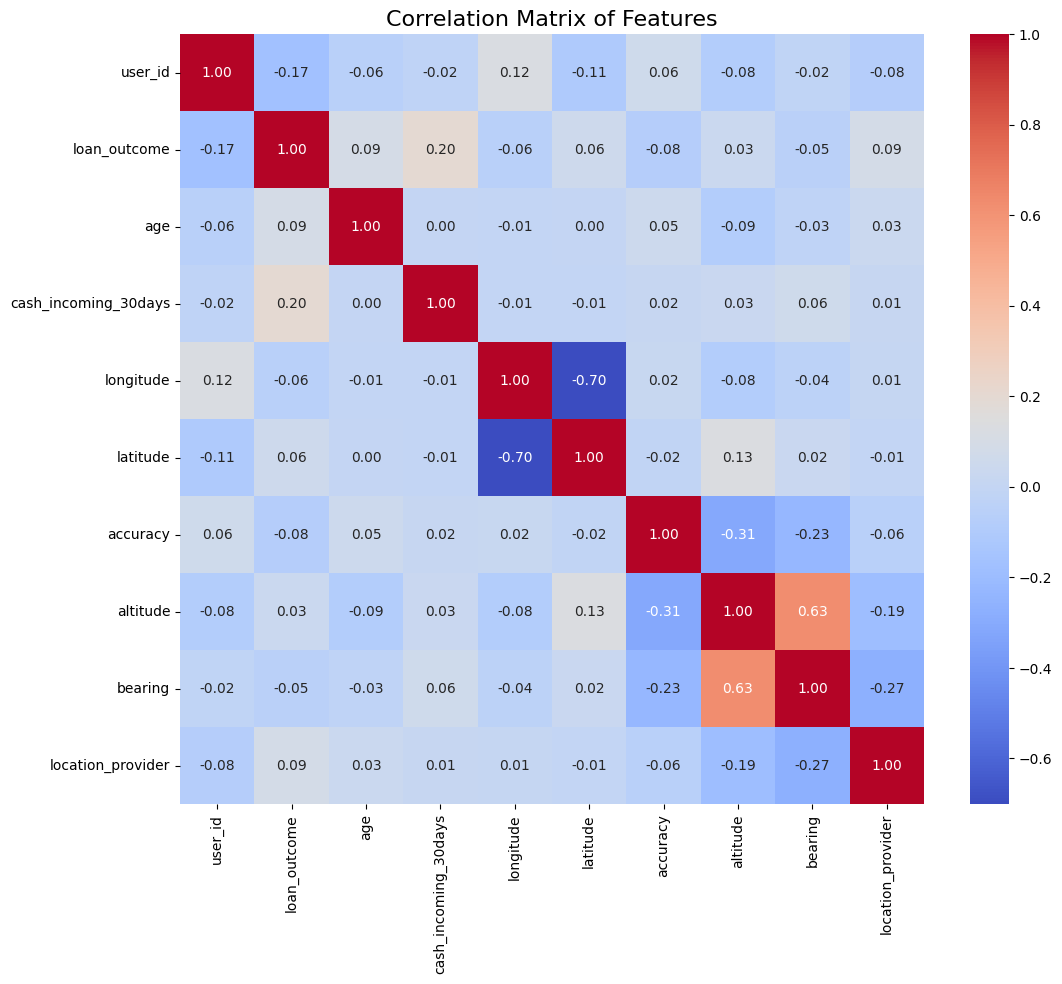

In [156]:


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'final_df' is your DataFrame
plt.figure(figsize=(12, 10))
correlation_matrix = final_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

In [157]:


# Identify positive correlations with 'loan_outcome'
positive_correlations = correlation_matrix['loan_outcome'][correlation_matrix['loan_outcome'] > 0]

# Print the positively correlated columns
print("Positively correlated columns with loan_outcome:")
positive_correlations

Positively correlated columns with loan_outcome:


loan_outcome            1.000000
age                     0.093311
cash_incoming_30days    0.200561
latitude                0.055331
altitude                0.029977
location_provider       0.087327
Name: loan_outcome, dtype: float64

In [158]:


# Identify negative correlations with 'loan_outcome'
negative_correlations = correlation_matrix['loan_outcome'][correlation_matrix['loan_outcome'] < 0]

# Print the negatively correlated columns
print("\nNegatively correlated columns with loan_outcome:")
negative_correlations


Negatively correlated columns with loan_outcome:


user_id     -0.171686
longitude   -0.063004
accuracy    -0.081643
bearing     -0.053535
Name: loan_outcome, dtype: float64

In [159]:


train_df = final_df[['loan_outcome', 'age', 'cash_incoming_30days', 'latitude','altitude', 'location_provider']]

In [160]:
train_df

loan_outcome  age  cash_incoming_30days   latitude     altitude  \
0               0   42               8988.12  -1.270427    75.690000   
1               1   36               9968.12  -1.488055  1030.603000   
2               0   27                 59.04  -0.889673  2190.900000   
3               0   38               2129.03  -0.306798     0.000000   
4               1   33               2102.53  17.800041   542.622222   
..            ...  ...                   ...        ...          ...   
367             0   29               1947.86  -0.171368   594.629032   
368             0   28               6099.13  -1.320227     0.000000   
369             0   24               7136.95  -0.222586  1431.777778   
370             0   62              18043.21  -1.295224   133.025000   
371             0   18               6277.52  -1.286509    -0.955556   

     location_provider  
0                    2  
1                    2  
2                    0  
3                    2  
4                    2  
..                 ...  
367                  2  
368                  2  
369                  0  
370                  1  
371                  1  

[372 rows x 6 columns]

In [161]:
train_df.dtypes

loan_outcome              int64
age                       int64
cash_incoming_30days    float64
latitude                float64
altitude                float64
location_provider         int64
dtype: object

In [162]:


train_df = train_df.astype('int64', errors='ignore')
train_df.dtypes

loan_outcome            int64
age                     int64
cash_incoming_30days    int64
latitude                int64
altitude                int64
location_provider       int64
dtype: object

# APPLYING LOGISTIC REGRESSION


Accuracy: 0.6133333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.50      0.59        42
           1       0.54      0.76      0.63        33

    accuracy                           0.61        75
   macro avg       0.63      0.63      0.61        75
weighted avg       0.64      0.61      0.61        75



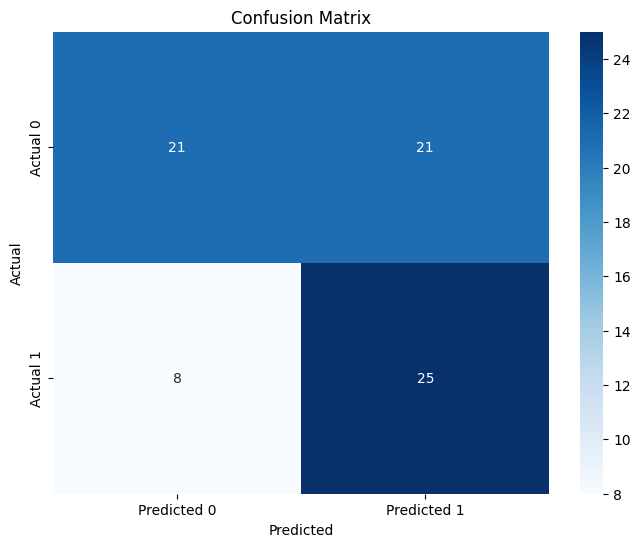

In [163]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'final_df' and 'train_df' are already defined as in the previous code
X = train_df.drop('loan_outcome', axis=1)  # Features
y = train_df['loan_outcome']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#RANDOM FOREST

Random Forest Accuracy: 0.6133333333333333

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.50      0.59        42
           1       0.54      0.76      0.63        33

    accuracy                           0.61        75
   macro avg       0.63      0.63      0.61        75
weighted avg       0.64      0.61      0.61        75



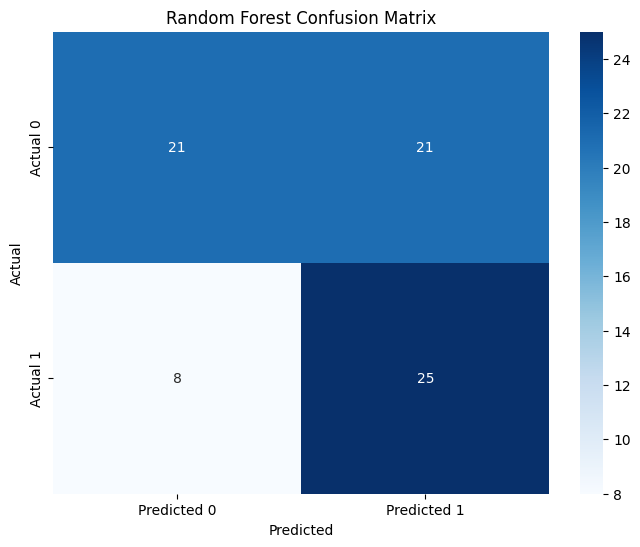

In [164]:


from sklearn.ensemble import RandomForestClassifier

# ... (Your existing code) ...

# Assuming 'final_df' and 'train_df' are already defined as in the previous code
X = train_df.drop('loan_outcome', axis=1)  # Features
y = train_df['loan_outcome']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Create a confusion matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# After applying GridSearchCV

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.6430508474576271
Best Random Forest Accuracy: 0.68

Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        42
           1       0.60      0.82      0.69        33

    accuracy                           0.68        75
   macro avg       0.70      0.69      0.68        75
weighted avg       0.71      0.68      0.68        75



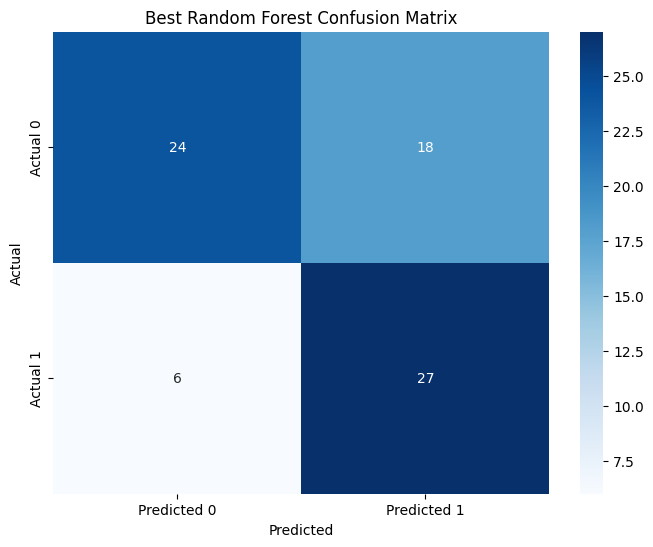

In [124]:


from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train a new model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
best_rf_y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
best_rf_accuracy = accuracy_score(y_test, best_rf_y_pred)
print(f"Best Random Forest Accuracy: {best_rf_accuracy}")

print("\nBest Random Forest Classification Report:")
print(classification_report(y_test, best_rf_y_pred))

# Create a confusion matrix for the best model
best_rf_cm = confusion_matrix(y_test, best_rf_y_pred)

# Plot the confusion matrix for the best model
plt.figure(figsize=(8, 6))
sns.heatmap(best_rf_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Best Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# XGBoost

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:35:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.6133333333333333

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.60      0.63        42
           1       0.55      0.64      0.59        33

    accuracy                           0.61        75
   macro avg       0.61      0.62      0.61        75
weighted avg       0.62      0.61      0.61        75



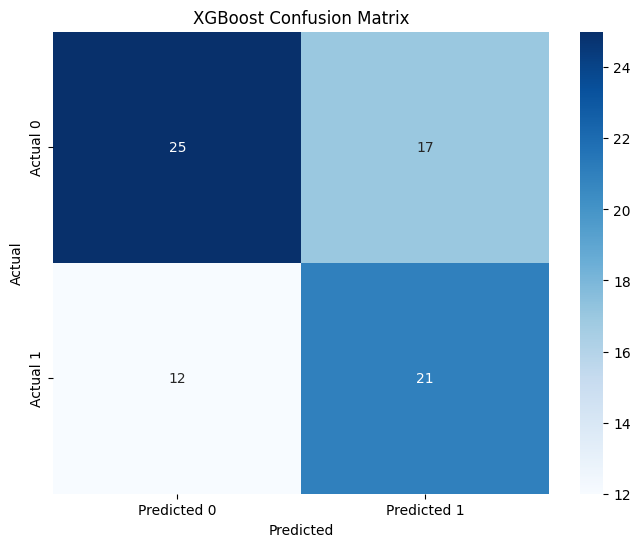

In [165]:


!pip install xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code) ...

# Assuming 'final_df' and 'train_df' are already defined as in the previous code
X = train_df.drop('loan_outcome', axis=1)  # Features
y = train_df['loan_outcome']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Use_label_encoder is deprecated
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"XGBoost Accuracy: {xgb_accuracy}")

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_y_pred))

# Create a confusion matrix
xgb_cm = confusion_matrix(y_test, xgb_y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [166]:
train_df1=final_df[['loan_outcome', 'age', 'cash_incoming_30days', 'latitude','altitude', 'location_provider','longitude','altitude']]

In [167]:
train_df1

loan_outcome  age  cash_incoming_30days   latitude     altitude  \
0               0   42               8988.12  -1.270427    75.690000   
1               1   36               9968.12  -1.488055  1030.603000   
2               0   27                 59.04  -0.889673  2190.900000   
3               0   38               2129.03  -0.306798     0.000000   
4               1   33               2102.53  17.800041   542.622222   
..            ...  ...                   ...        ...          ...   
367             0   29               1947.86  -0.171368   594.629032   
368             0   28               6099.13  -1.320227     0.000000   
369             0   24               7136.95  -0.222586  1431.777778   
370             0   62              18043.21  -1.295224   133.025000   
371             0   18               6277.52  -1.286509    -0.955556   

     location_provider  longitude     altitude  
0                    2  36.782813    75.690000  
1                    2  37.118432  1030.603000  
2                    0  35.707550  2190.900000  
3                    2  36.082255     0.000000  
4                    2 -12.370879   542.622222  
..                 ...        ...          ...  
367                  2  35.432604   594.629032  
368                  2  36.886921     0.000000  
369                  0  37.647427  1431.777778  
370                  1  36.877087   133.025000  
371                  1  37.343906    -0.955556  

[372 rows x 8 columns]

In [168]:


# Assuming 'final_df' and 'train_df1' are already defined as in the previous code
X = train_df1.drop('loan_outcome', axis=1)  # Features
y = train_df1['loan_outcome']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# ... (rest of your evaluation code)

Logistic Regression Accuracy: 0.5733333333333334

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.48      0.56        42
           1       0.51      0.70      0.59        33

    accuracy                           0.57        75
   macro avg       0.59      0.59      0.57        75
weighted avg       0.60      0.57      0.57        75



Random Forest Accuracy: 0.6933333333333334

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        42
           1       0.63      0.73      0.68        33

    accuracy                           0.69        75
   macro avg       0.69      0.70      0.69        75
weighted avg       0.70      0.69      0.69        75



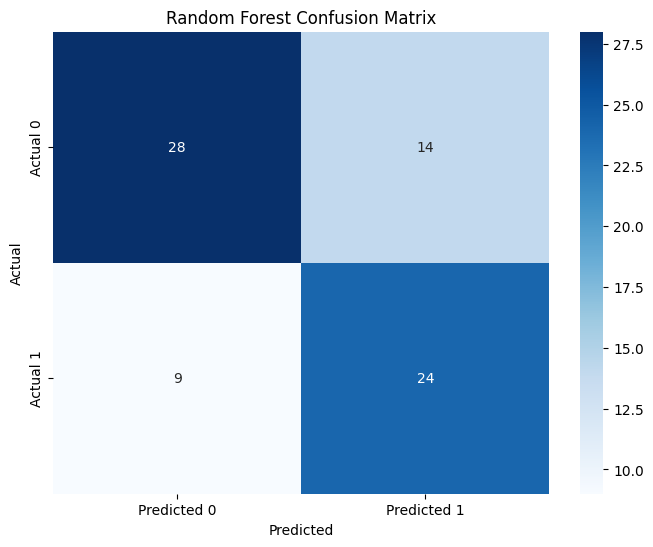

In [169]:


# Assuming 'final_df' and 'train_df1' are already defined as in the previous code
X = train_df1.drop('loan_outcome', axis=1)  # Features
y = train_df1['loan_outcome']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Create a confusion matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Score: 0.622994350282486
Best Random Forest Accuracy: 0.6933333333333334

Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.62      0.69        42
           1       0.62      0.79      0.69        33

    accuracy                           0.69        75
   macro avg       0.70      0.70      0.69        75
weighted avg       0.71      0.69      0.69        75



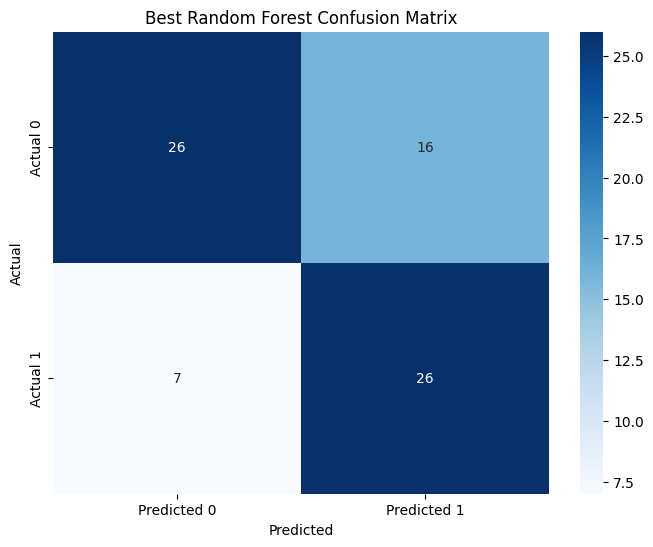

In [170]:


# Assuming 'final_df' and 'train_df1' are already defined as in the previous code
X = train_df1.drop('loan_outcome', axis=1)  # Features
y = train_df1['loan_outcome']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train a new model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
best_rf_y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
best_rf_accuracy = accuracy_score(y_test, best_rf_y_pred)
print(f"Best Random Forest Accuracy: {best_rf_accuracy}")

print("\nBest Random Forest Classification Report:")
print(classification_report(y_test, best_rf_y_pred))

# Create a confusion matrix for the best model
best_rf_cm = confusion_matrix(y_test, best_rf_y_pred)

# Plot the confusion matrix for the best model
plt.figure(figsize=(8, 6))
sns.heatmap(best_rf_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Best Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Conclusion



*** The Logistic Regression model achieved an accuracy of 61%.  The initial Random Forest model had an accuracy of 61% , which improved to 68%  accuracy score after hyperparameter tuning with GridSearchCV after optimization.  Finally, the XGBoost model demonstrated an accuracy of 61%. Further i trained the model on some more features which were negatively correlated and could back the accuracy of 57% using Logistic Regression and acheived an accuracy of 69% after GridSearchCV using Random Forest with more features. ***

# API

In [174]:
import joblib  # Import joblib for saving the model

joblib.dump(best_rf_model, 'best_rf_model.pkl')

print("Model saved successfully!")


Model saved successfully!


In [176]:
pip install flask


In [177]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('best_rf_model.pkl')

# Initialize Flask app
app = Flask(__name__)

# Define a route to make predictions
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the data from the POST request
        data = request.get_json()

        # Extract user data (e.g., features) from the incoming request
        user_data = data['user_data']  # Assuming user_data is a dictionary of features

        # Convert user data into DataFrame to match the model's input format
        user_df = pd.DataFrame([user_data])

        # Ensure the columns match the ones the model was trained on
        # If necessary, preprocess the data (e.g., scaling, encoding)

        # Get the prediction from the model
        prediction = model.predict(user_df)

        # Return the prediction as JSON
        response = {
            'prediction': int(prediction[0])  # Convert the prediction to int (0 or 1)
        }
        return jsonify(response)

    except Exception as e:
        # Handle errors gracefully
        return jsonify({'error': str(e)}), 400

# Run the Flask app
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
